In [10]:
import pandas as pd
import seaborn as sns
data = pd.read_fwf('Nov 2020.txt', error_bad_lines=False)
data = data["County\tElection Date\tPrecinct\tContest Group ID\tContest Type\tContest Name\tChoice\tChoice Party\tVote For\tElection Day\tOne Stop\tAbsentee"]
data = data.str.split(pat="\t")
concatlength = pd.concat([data, data.str.len()], axis=1)
concatlength = concatlength[concatlength.iloc[:, 1] == 15]
data = concatlength.iloc[:, 0]

In [11]:
Nov2020 = pd.DataFrame(data.tolist())
Nov2020.columns = ["County", "Election Date", "Precinct", "Contest Group ID", "Contest Type", "Contest Name", "Choice", "Choice Party", "Vote For", "Election Day", "One Stop", "Absentee by Mail", "Provisional", "Total Votes", "Real Precinct"]
Nov2020.head()

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct
0,TYRRELL,11/03/2020,3,1359,S,NC TREASURER,Ronnie Chatterji,DEM,1,16,0,0,0,16,Y
1,WAYNE,11/03/2020,06,1011,S,NC COURT OF APPEALS JUDGE SEAT 05,Fred Gore,REP,1,95,0,0,0,95,Y
2,FORSYTH,11/03/2020,081,1342,S,NC SUPERINTENDENT OF PUBLIC INSTRUCTION,Jen Mangrum,DEM,1,204,1076,367,7,1654,Y
3,NEW HANOVER,11/03/2020,W03,1373,S,US PRESIDENT,Donald J. Trump,REP,1,71,0,31,1,103,Y
4,MECKLENBURG,11/03/2020,241,1008,S,NC COMMISSIONER OF INSURANCE,Mike Causey,REP,1,348,2257,0,0,2605,Y


In [12]:
governor = Nov2020[Nov2020["Contest Name"] == "NC GOVERNOR"]
president = Nov2020[Nov2020["Contest Name"] == "US PRESIDENT"]
ussenate = Nov2020[Nov2020["Contest Name"] == "US SENATE"]

governor = governor[governor["Choice Party"] != ""]
president = president[president["Choice Party"] != ""]
ussenate = ussenate[ussenate["Choice Party"] != ""]

governor['Total Votes'] = governor['Total Votes'].astype(int)
president['Total Votes'] = president['Total Votes'].astype(int)
ussenate['Total Votes'] = ussenate['Total Votes'].astype(int)

In [47]:
prespiv = president.pivot_table("Total Votes", index = "County", columns = "Choice Party", aggfunc = sum)
govpiv = governor.pivot_table("Total Votes", index = "County", columns = "Choice Party", aggfunc = sum)
prespiv.reset_index(inplace=True)
govpiv.reset_index(inplace=True)

prespiv.columns = ["County","CST", "DEM", "GRE", "LIB", "REP"]
# prespiv['County'] = prespiv.index

govpiv.columns = ["County","CST", "DEM", "LIB", "REP"]
# govpiv['County'] = govpiv.index

govpiv

,County,CST,DEM,LIB,REP
0,ALAMANCE,282,41979,756,42918
1,ALEXANDER,75,4980,152,14980
2,ALLEGHANY,23,1929,47,4085
3,ANSON,38,6116,75,4977
4,ASHE,60,4967,128,10622
...,...,...,...,...,...
95,WAYNE,224,25589,447,29056
96,WILKES,94,9537,250,25469
97,WILSON,104,22014,262,18305
98,YADKIN,54,4777,159,14910


In [14]:
print(prespiv.sum().sum())
print(govpiv.sum().sum())
difference = prespiv.sum().sum() - govpiv.sum().sum()
print(difference)

5511487
5502777
8710


There were 5511487 total votes for the presidential race and 5502777 for the governors race. The difference is only 8710.

Text(0.5, 1.0, 'North Carolina 2020 Gubernatorial Voting Distribution by County')

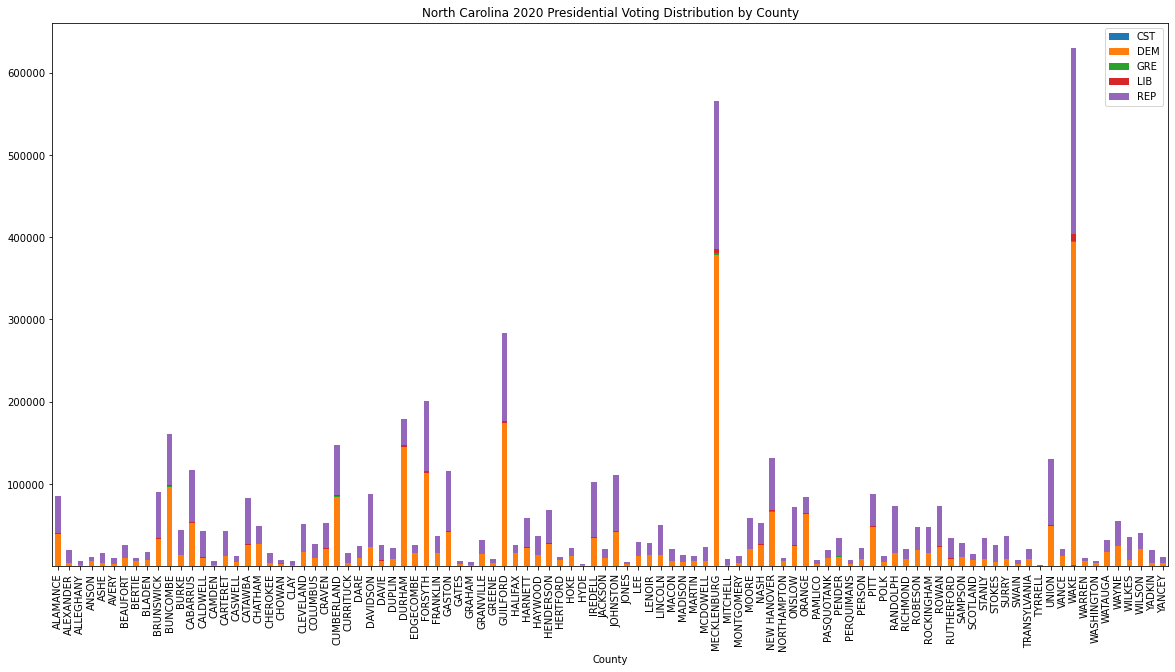

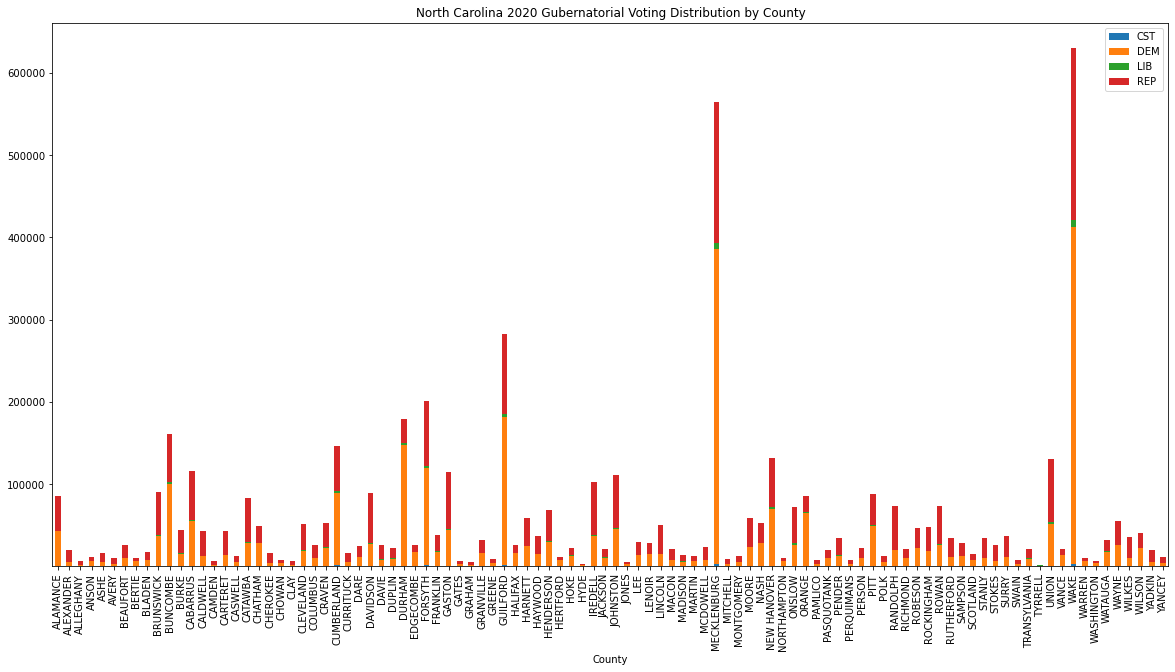

In [15]:
prespiv.plot.bar(stacked = True, figsize=(20,10)).set_title("North Carolina 2020 Presidential Voting Distribution by County")
govpiv.plot.bar(stacked = True, figsize=(20,10)).set_title("North Carolina 2020 Gubernatorial Voting Distribution by County")

The distribution of votes between parties seems to be very similar for each of the elections. There seems to be more third party votes in the Gubernatorial election though than in the presidential election.

In [19]:
import numpy as np

df = pd.read_csv(
    'voter_stats_20201103.txt', sep='    ',header=None, keep_default_na=False)
df = df[0]
df = df.str.split(pat = '\t')

# type construction
final_data = [x for x in df]
final_data = np.array(final_data)
voter_data = pd.DataFrame(final_data)
voter_data.head()

<ipython-input-19-6a305c659562>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(


,0,1,2,3,4,5,6,7,8,9,10,11
0,county_desc,election_date,stats_type,precinct_abbrv,vtd_abbrv,party_cd,race_code,ethnic_code,sex_code,age,total_voters,update_date
1,IREDELL,11/03/2020,voter,EM,EM,DEM,U,HL,M,Age 41 - 65,1,05/17/2021
2,GUILFORD,11/03/2020,voter,G60,G60,LIB,W,NL,M,Age 18 - 25,1,05/17/2021
3,WAKE,11/03/2020,voter,07-12,07-12,REP,W,UN,F,Age 41 - 65,12,05/17/2021
4,MOORE,11/03/2020,voter,RBN,RBN,UNA,U,UN,U,Age 26 - 40,6,05/17/2021


In [20]:
#column renaming
# link to data map: https://s3.amazonaws.com/dl.ncsbe.gov/ENRS/layout_voter_stats.txt
#county_desc	election_date	stats_type	precinct_abbrv	vtd_abbrv	party_cd	race_code	ethnic_code	sex_code	age	total_voters	update_date
voter_data = voter_data.rename(columns={0: 'county_desc', 1: 'election_date', 2: 'stats_type', 3: 'precinct_abbrv', 4: 'vtd_abbrv', 5: 'party_cd', 6: 'race_code',
7: 'ethnic_code', 8: 'sex_code', 9: 'age', 10: 'total_voters', 11: 'update_date'})
voter_data.head()

"""A	               ASIAN
B	               BLACK or AFRICAN AMERICAN
I	               INDIAN AMERICAN or ALASKA NATIVE
M	               TWO or MORE RACES
O	               OTHER
U	               UNDESIGNATED
W	               WHITE"""
race_changes = []
for x in voter_data['race_code']:
    if x == 'U':
        race_changes.append('Undesignated')
    elif x == 'B':
        race_changes.append('Black')
    elif x == 'I':
        race_changes.append('Indian American')
    elif x == 'M':
        race_changes.append('Biracial')
    elif x == 'O':
        race_changes.append('Other')
    elif x == 'W':
        race_changes.append('White')
    elif x == 'A':
        race_changes.append('Asian')
    else:
        race_changes.append(np.NaN)
voter_data['race_code'] = pd.Series(race_changes)

In [21]:
#sorted table for potential insertion 
sorted_voter_data = voter_data.sort_values('county_desc')
sorted_voter_data.head()

,county_desc,election_date,stats_type,precinct_abbrv,vtd_abbrv,party_cd,race_code,ethnic_code,sex_code,age,total_voters,update_date
535053,ALAMANCE,11/03/2020,voter,06S,06S,UNA,Biracial,HL,M,Age 41 - 65,1,05/17/2021
417822,ALAMANCE,11/03/2020,voter,12S,12S,UNA,Undesignated,UN,U,Age 26 - 40,20,05/17/2021
12881,ALAMANCE,11/03/2020,voter,06S,06S,UNA,Asian,UN,F,Age 26 - 40,1,05/17/2021
483058,ALAMANCE,11/03/2020,voter,01,01,DEM,Undesignated,UN,M,Age 26 - 40,2,05/17/2021
47062,ALAMANCE,11/03/2020,voter,064,064,DEM,White,NL,F,Age Over 66,141,05/17/2021


In [49]:
sorted_voter_data['total_voters'] = pd.to_numeric(sorted_voter_data['total_voters'], errors='coerce')
sorted_voter_data = sorted_voter_data.dropna(subset=['total_voters'])
sorted_voter_data['total_voters'] = sorted_voter_data['total_voters'].astype('int')

racepiv = sorted_voter_data.pivot_table("total_voters", index = "county_desc", columns = "race_code", aggfunc = sum)
racepiv.reset_index(inplace=True)
racepiv.columns = ["County","Asian", "Biracial", "Black", "Indian American", "Other", "Undesignated", "White"]
allraces = racepiv["Asian"]+racepiv["Biracial"]+racepiv["Black"]+racepiv["Indian American"]+racepiv["Other"]+racepiv["Undesignated"]+racepiv["White"]
racepiv["allraces"] = allraces
racepiv["Asian"] = racepiv["Asian"]/racepiv["allraces"]
racepiv["Biracial"] = racepiv["Biracial"]/racepiv["allraces"]
racepiv["Black"] = racepiv["Black"]/racepiv["allraces"]
racepiv["Indian American"] = racepiv["Indian American"]/racepiv["allraces"]
racepiv["Other"] = racepiv["Other"]/racepiv["allraces"]
racepiv["Undesignated"] = racepiv["Undesignated"]/racepiv["allraces"]
racepiv["White"] = racepiv["White"]/racepiv["allraces"]
del racepiv['allraces']
racepiv

,County,Asian,Biracial,Black,Indian American,Other,Undesignated,White
0,ALAMANCE,0.008236,0.007255,0.197105,0.002484,0.024843,0.112774,0.647302
1,ALEXANDER,0.005928,0.001762,0.037570,0.001482,0.010013,0.076701,0.866544
2,ALLEGHANY,0.000655,0.002097,0.009961,0.001048,0.009436,0.092267,0.884535
3,ANSON,0.004601,0.001434,0.407350,0.001673,0.007171,0.176935,0.400837
4,ASHE,0.002044,0.001022,0.005621,0.001226,0.006438,0.072356,0.911293
...,...,...,...,...,...,...,...,...
95,WAYNE,0.006420,0.005162,0.321358,0.001821,0.036018,0.083382,0.545838
96,WILKES,0.002047,0.003094,0.036831,0.001092,0.011966,0.073413,0.871556
97,WILSON,0.004444,0.003851,0.404963,0.001865,0.027133,0.077462,0.480282
98,YADKIN,0.001941,0.001981,0.029964,0.001173,0.020987,0.078488,0.865467


# Hypothesis Test

We will be exploring the relationship between whether or not a county had more Democrat or Republican votes for governor and the proportion of white voters in the county.

Null Hypothesis H0: The proportion of white voters for Democrat voting counties is the same as for Republican voting counties

Alternative Hypothesis HA: The proportion of white voters for Democrat voting counties is different than for Republican voting counties

In [64]:
from scipy import stats

govwrace = pd.merge(govpiv, racepiv)
preswrace = pd.merge(prespiv, racepiv)

govwrace['DorR'] = np.where(govwrace['DEM'] > govwrace["REP"] , "D", "R")
preswrace['DorR'] = np.where(preswrace['DEM'] > preswrace["REP"] , "D", "R")

govwrace

,County,CST,DEM,LIB,REP,Asian,Biracial,Black,Indian American,Other,Undesignated,White,DorR
0,ALAMANCE,282,41979,756,42918,0.008236,0.007255,0.197105,0.002484,0.024843,0.112774,0.647302,R
1,ALEXANDER,75,4980,152,14980,0.005928,0.001762,0.037570,0.001482,0.010013,0.076701,0.866544,R
2,ALLEGHANY,23,1929,47,4085,0.000655,0.002097,0.009961,0.001048,0.009436,0.092267,0.884535,R
3,ANSON,38,6116,75,4977,0.004601,0.001434,0.407350,0.001673,0.007171,0.176935,0.400837,D
4,ASHE,60,4967,128,10622,0.002044,0.001022,0.005621,0.001226,0.006438,0.072356,0.911293,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,WAYNE,224,25589,447,29056,0.006420,0.005162,0.321358,0.001821,0.036018,0.083382,0.545838,R
96,WILKES,94,9537,250,25469,0.002047,0.003094,0.036831,0.001092,0.011966,0.073413,0.871556,R
97,WILSON,104,22014,262,18305,0.004444,0.003851,0.404963,0.001865,0.027133,0.077462,0.480282,D
98,YADKIN,54,4777,159,14910,0.001941,0.001981,0.029964,0.001173,0.020987,0.078488,0.865467,R


In [62]:
govDwon = govwrace[govwrace["DorR"] == "D"]
govRwon = govwrace[govwrace["DorR"] == "R"]

stats.ttest_ind(govRwon["White"], govDwon["White"], equal_var = False)

Ttest_indResult(statistic=7.924168906826411, pvalue=2.741348794617841e-10)

In [63]:
presDwon = preswrace[preswrace["DorR"] == "D"]
presRwon = preswrace[preswrace["DorR"] == "R"]

stats.ttest_ind(presRwon["White"], presDwon["White"], equal_var = False)

Ttest_indResult(statistic=6.672813164776771, pvalue=6.732201159972443e-08)

In [70]:
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [71]:
create_download_link(govwrace)

In [72]:
create_download_link(preswrace)